

# Project: Investigate a Dataset - TMDb Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.TMDb movie data set contains this list of columns:
[id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj].

The dataset provided and further used to answer many questions. 


### Question(s) for Analysis
1-Which genres are most popular from year to year?

2-What kinds of properties are associated with movies that have high revenues?

In [475]:
import numpy as np  #imporiting the libraries needed for the project
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

<a id='wrangling'></a>
## Data Wrangling




### General Properties


Loading the dataset and exploring the data columns we have in the data set:

In [435]:
df=pd.read_csv("./tmdb-movies.csv")
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Getting list of columns names in the dataset

In [272]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']


### Data Cleaning
 

Removing columns that are irrelevant to our analysis 

In [273]:
df.drop(['budget_adj','id','budget','revenue','homepage','tagline','keywords','overview','release_date','imdb_id'], axis=1,inplace=True)
df.head()

popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year   revenue_adj  
0           6.5          2015  1.392446e+09  
1           7.1          2015  3.481613e+08  
2           6.3          2015  2.716190e+08  
3           7.5          2015  1.902723e+09  
4           7.3          2015  1.385749e+09

See how many colomns and rows we have in the dateset:

In [274]:
df.shape

(10866, 11)

Removing duplicate rows:

In [275]:
df.drop_duplicates(inplace=True)

In [276]:
df.shape

(10865, 11)

see missing values for each columns

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


Removing missing value rows will be done during answering questions because having more data will increase our analysis accuracy 

Getting statistical information of the dataframe:

In [279]:
df.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10865.000000  10865.000000  10865.000000  10865.000000  10865.000000   
mean       0.646446    102.071790    217.399632      5.975012   2001.321859   
std        1.000231     31.382701    575.644627      0.935138     12.813260   
min        0.000065      0.000000     10.000000      1.500000   1960.000000   
25%        0.207575     90.000000     17.000000      5.400000   1995.000000   
50%        0.383831     99.000000     38.000000      6.000000   2006.000000   
75%        0.713857    111.000000    146.000000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

        revenue_adj  
count  1.086500e+04  
mean   5.136900e+07  
std    1.446383e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    3.370173e+07  
max    2.827124e+09

Define function that can split values in the dataframe columns:

In [466]:
def colspliter(df1,colname):
    df1=pd.read_csv("./tmdb-movies.csv")
    df1.drop(['budget_adj','id','budget','revenue','homepage','tagline','keywords','overview','release_date','imdb_id'], axis=1,inplace=True)
    df1.dropna(inplace=True)
    df1[colname]=df1[colname].str.split('|')#Split into a list
    df1=df1.explode(colname)#Convert list into multiple rows
    df1=df1.drop_duplicates()#Clean and transform data
    return df1

<a id='eda'></a>
## Exploratory Data Analysis




### Which genres are most popular from year to year?

In [375]:
df1=df.dropna(subset=['popularity','release_year','genres'])
#drop rowes that does not have value in release-year , Popularity genres value.


In [296]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
revenue_adj             10842 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.4+ KB


Showing how many movies in each genres.

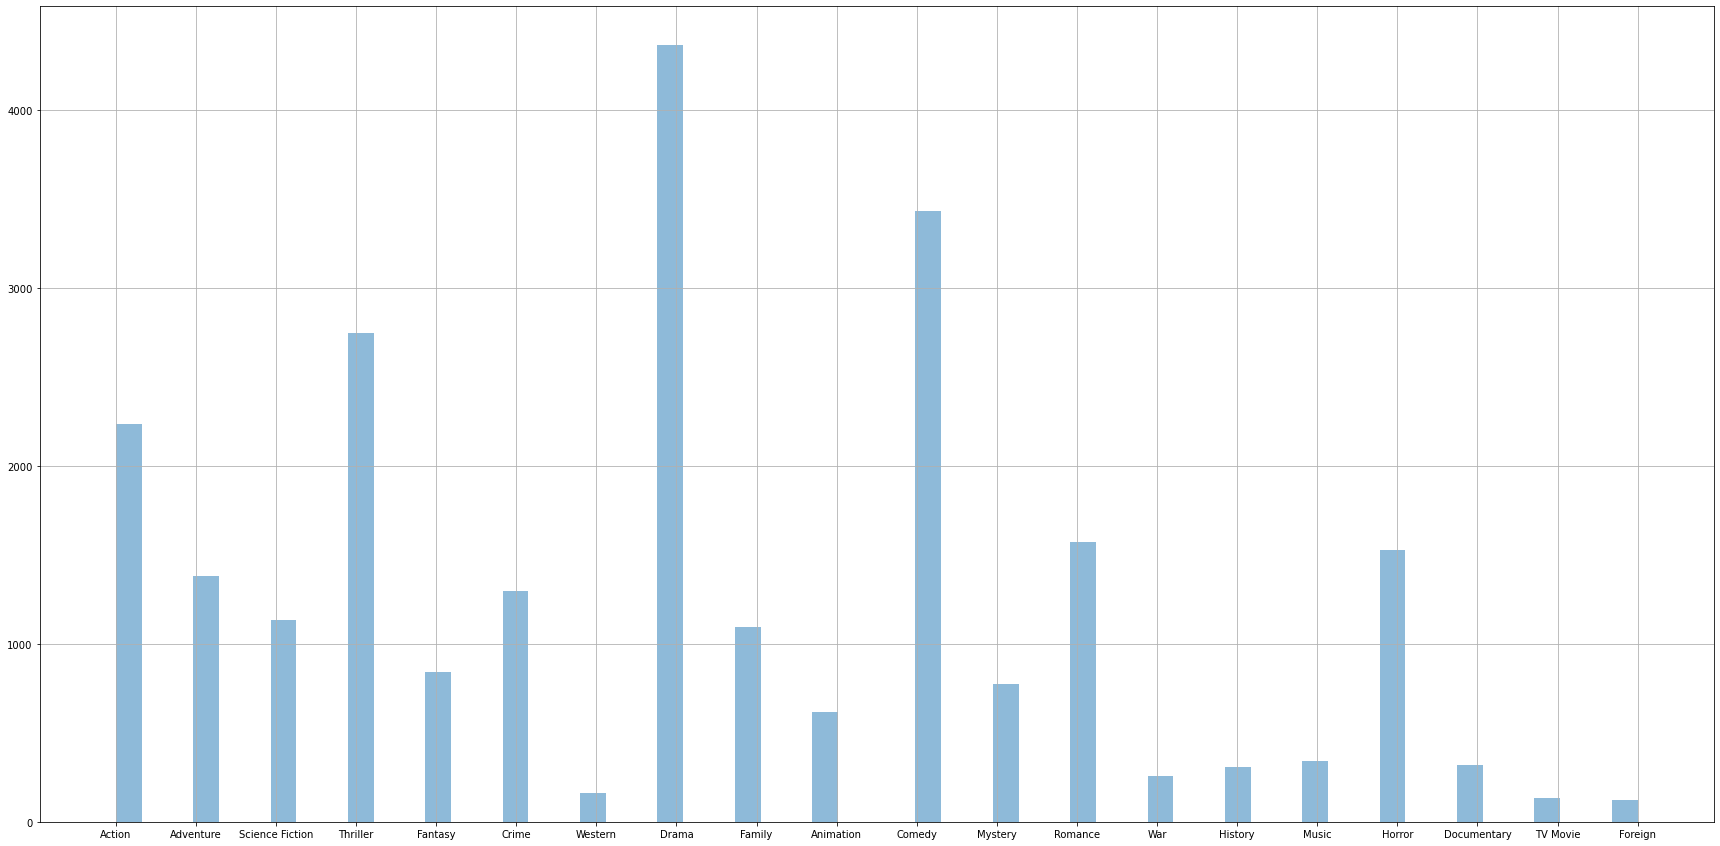

In [465]:
colspliter(df1,'genres')['genres'].hist(alpha=0.5, bins=59,figsize=(30,15))

**First, trying to answer the question by looking at the popularity measuerd already:**

The code below group genres whith released year and find the popularity mean of each genres for each year:

In [297]:
df1=colspliter(df1,'genres').groupby(['release_year','genres']).popularity.mean().unstack()

In [298]:
df1.head()

genres          Action  Adventure  Animation    Comedy     Crime  Documentary  \
release_year                                                                    
1960          0.590724   0.700981        NaN  0.396000  0.346480          NaN   
1961          0.365913   0.767323   2.631987  0.679838  0.806519          NaN   
1962          0.845972   0.942513        NaN  0.273183  0.472816          NaN   
1963          0.951729   0.728487   2.180410  0.444481  0.552367          NaN   
1964          0.813087   0.736431   0.445746  0.491229  0.261690          NaN   

genres           Drama    Family   Fantasy   Foreign   History    Horror  \
release_year                                                               
1960          0.566305  0.278064  0.428247  0.194948  0.412364  0.591450   
1961          0.432233  0.896028  0.113651  0.113651  0.334463  0.254578   
1962          0.401909  0.323463  0.235542  0.235542  0.640491  0.179368   
1963          0.322448  0.852632  0.214071  0.351647  0.481618  0.376901   
1964          0.364818  0.878298  0.780640  0.152209  0.316377  0.189650   

genres           Music   Mystery   Romance  Science Fiction  TV Movie  \
release_year                                                            
1960          0.423531       NaN  0.541227         0.327905       NaN   
1961          0.564749  0.712793  0.426036         0.300638       NaN   
1962          0.323933  0.259220  0.365621         0.179212       NaN   
1963               NaN  0.421033  0.399573         0.467836       NaN   
1964          0.753799  0.308091  0.221586         0.226636       NaN   

genres        Thriller       War   Western  
release_year                                
1960          0.811910  0.225863  0.567759  
1961               NaN  0.531184  0.210021  
1962          0.760582  0.700762  0.414180  
1963          0.719929  0.664326  0.246957  
1964          0.622580  0.930959  0.127679

creating two new columns:

1-the maximum mean popularity value for each year.

2-the name of genres that has that value in each year.

In [299]:
df1['mean_popularity']=df1.max(axis=1)
df1['Genres']=df1.idxmax(axis=1)

In [300]:
df1.head()

genres          Action  Adventure  Animation    Comedy     Crime  Documentary  \
release_year                                                                    
1960          0.590724   0.700981        NaN  0.396000  0.346480          NaN   
1961          0.365913   0.767323   2.631987  0.679838  0.806519          NaN   
1962          0.845972   0.942513        NaN  0.273183  0.472816          NaN   
1963          0.951729   0.728487   2.180410  0.444481  0.552367          NaN   
1964          0.813087   0.736431   0.445746  0.491229  0.261690          NaN   

genres           Drama    Family   Fantasy   Foreign  ...     Music   Mystery  \
release_year                                          ...                       
1960          0.566305  0.278064  0.428247  0.194948  ...  0.423531       NaN   
1961          0.432233  0.896028  0.113651  0.113651  ...  0.564749  0.712793   
1962          0.401909  0.323463  0.235542  0.235542  ...  0.323933  0.259220   
1963          0.322448  0.852632  0.214071  0.351647  ...       NaN  0.421033   
1964          0.364818  0.878298  0.780640  0.152209  ...  0.753799  0.308091   

genres         Romance  Science Fiction  TV Movie  Thriller       War  \
release_year                                                            
1960          0.541227         0.327905       NaN  0.811910  0.225863   
1961          0.426036         0.300638       NaN       NaN  0.531184   
1962          0.365621         0.179212       NaN  0.760582  0.700762   
1963          0.399573         0.467836       NaN  0.719929  0.664326   
1964          0.221586         0.226636       NaN  0.622580  0.930959   

genres         Western  mean_popularity     Genres  
release_year                                        
1960          0.567759         0.811910   Thriller  
1961          0.210021         2.631987  Animation  
1962          0.414180         0.942513  Adventure  
1963          0.246957         2.180410  Animation  
1964          0.127679         0.930959        War  

[5 rows x 22 columns]

droping unnecessary columns that has lower mean popularity and keeping the highest 

In [304]:
df_most_popular_movies=df1[['Genres','mean_popularity']]
df_most_popular_movies.head()

genres           Genres  mean_popularity
release_year                            
1960           Thriller         0.811910
1961          Animation         2.631987
1962          Adventure         0.942513
1963          Animation         2.180410
1964                War         0.930959

In [306]:
df_most_popular_movies.columns.name = None  #removing column name
df_most_popular_movies.reset_index(inplace=True)   #rest index

the dataframe below shows the most popular gerne for each year

In [307]:
df_most_popular_movies

release_year           Genres  mean_popularity
0           1960         Thriller         0.811910
1           1961        Animation         2.631987
2           1962        Adventure         0.942513
3           1963        Animation         2.180410
4           1964              War         0.930959
5           1965            Music         0.968850
6           1966        Animation         0.751857
7           1967        Animation         2.550704
8           1968          Mystery         1.519456
9           1969            Crime         0.948020
10          1970        Animation         1.127718
11          1971           Family         1.530722
12          1972            Crime         1.226152
13          1973        Animation         0.956526
14          1974          Mystery         0.702035
15          1975        Adventure         0.880297
16          1976            Crime         0.707249
17          1977  Science Fiction         1.508653
18          1978            Music         0.679805
19          1979           Action         1.410014
20          1980  Science Fiction         0.897143
21          1981        Adventure         0.981504
22          1982              War         1.143183
23          1983        Adventure         0.900596
24          1984           Family         0.823924
25          1985           Family         0.976498
26          1986        Animation         0.852705
27          1987          History         0.815643
28          1988        Animation         0.908417
29          1989        Animation         1.683815
30          1990        Adventure         0.824644
31          1991        Animation         1.665002
32          1992        Animation         1.286893
33          1993          Fantasy         0.918601
34          1994            Crime         1.344236
35          1995        Animation         1.681856
36          1996            Crime         0.976838
37          1997        Animation         1.174855
38          1998              War         1.246619
39          1999        Adventure         1.167837
40          2000              War         0.909605
41          2001          Fantasy         1.831481
42          2002          Fantasy         1.603498
43          2003          Fantasy         1.951103
44          2004          Fantasy         1.432060
45          2005          Fantasy         1.198583
46          2006          Fantasy         1.096642
47          2007          Fantasy         0.985873
48          2008        Adventure         1.066031
49          2009        Adventure         1.207174
50          2010        Adventure         1.393734
51          2011        Adventure         1.210886
52          2012          Western         2.242083
53          2013  Science Fiction         1.443409
54          2014  Science Fiction         2.486967
55          2015        Adventure         3.417373

also the result can be polted as below

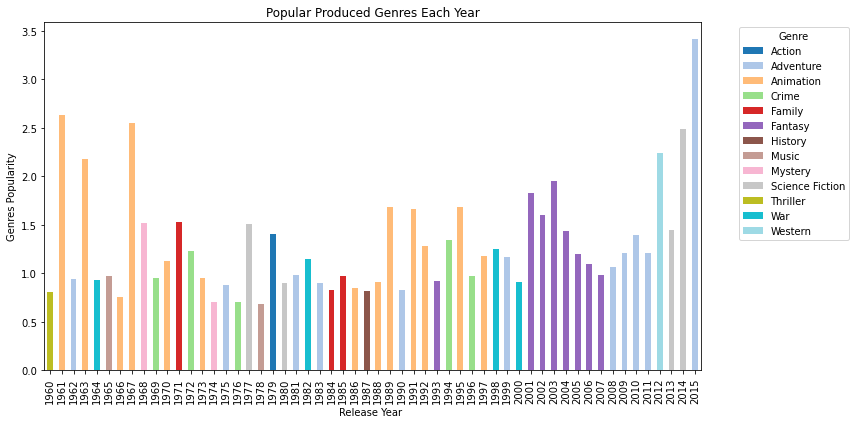

In [468]:
genre = df_most_popular_movies.groupby(['release_year', 'Genres']).mean_popularity.mean().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Popular Produced Genres Each Year')
plt.xlabel('Release Year ')
plt.ylabel('Genres Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Seconed, we can measure the most popular genres by looking at the number of movies each genres has in each year:**

In [310]:
df2=df.dropna(subset=['popularity','release_year','genres'])
#drop rowes that does not have value in release-year and genres value.

Splitting genres columns and calculate how many movies in each genres in each year.

In [311]:
df2=colspliter(df,'genres').groupby('release_year')['genres'].value_counts().to_frame().unstack()

data frame below has all information to pick the highest count of genres each year:


creating two new columns:

1-the maximum number of movies value for each year.

2-the name of genres that has that value in each year.

In [312]:
df2['number_of_movies']=df2['genres'].max(axis=1)
df2['Genres']=df2['genres'].idxmax(axis=1)

In [313]:
df2.head()

genres                                                            \
genres       Action Adventure Animation Comedy Crime Documentary Drama Family   
release_year                                                                    
1960            8.0       5.0       NaN    8.0   2.0         NaN  13.0    3.0   
1961            7.0       6.0       1.0   10.0   2.0         NaN  16.0    4.0   
1962            6.0       7.0       NaN    5.0   3.0         NaN  19.0    2.0   
1963            4.0       7.0       1.0   13.0   4.0         NaN  13.0    3.0   
1964            5.0       5.0       2.0   16.0  10.0         NaN  20.0    4.0   

                              ...                                        \
genres       Fantasy Foreign  ... Music Mystery Romance Science Fiction   
release_year                  ...                                         
1960             2.0     1.0  ...   1.0     NaN     6.0             3.0   
1961             1.0     1.0  ...   2.0     1.0     7.0             3.0   
1962             1.0     1.0  ...   1.0     4.0     5.0             2.0   
1963             2.0     2.0  ...   NaN     6.0     8.0             2.0   
1964             3.0     1.0  ...   5.0     4.0     9.0             4.0   

                                            number_of_movies  Genres  
genres       TV Movie Thriller  War Western                           
release_year                                                          
1960              NaN      6.0  2.0     6.0             13.0   Drama  
1961              NaN      NaN  2.0     3.0             16.0   Drama  
1962              NaN      7.0  2.0     3.0             19.0   Drama  
1963              NaN     10.0  1.0     2.0             13.0  Comedy  
1964              NaN      9.0  3.0     1.0             20.0   Drama  

[5 rows x 22 columns]

droping unnecessary columns that has lower movies number and keeping the highest 

In [314]:
df2=df2[['Genres','number_of_movies']]
df2.head()

Genres number_of_movies
genres                               
release_year                         
1960           Drama             13.0
1961           Drama             16.0
1962           Drama             19.0
1963          Comedy             13.0
1964           Drama             20.0

In [315]:
df2.reset_index(inplace=True)
df2.index.name = None
df2

release_year  Genres number_of_movies
genres                                      
0              1960   Drama             13.0
1              1961   Drama             16.0
2              1962   Drama             19.0
3              1963  Comedy             13.0
4              1964   Drama             20.0
5              1965   Drama             19.0
6              1966  Comedy             15.0
7              1967  Comedy             16.0
8              1968   Drama             19.0
9              1969   Drama             13.0
10             1970   Drama             19.0
11             1971   Drama             30.0
12             1972   Drama             16.0
13             1973   Drama             31.0
14             1974   Drama             21.0
15             1975   Drama             17.0
16             1976   Drama             22.0
17             1977   Drama             23.0
18             1978   Drama             28.0
19             1979   Drama             30.0
20             1980   Drama             32.0
21             1981   Drama             32.0
22             1982   Drama             33.0
23             1983   Drama             34.0
24             1984  Comedy             37.0
25             1985  Comedy             50.0
26             1986   Drama             48.0
27             1987  Comedy             53.0
28             1988  Comedy             65.0
29             1989  Comedy             59.0
30             1990   Drama             58.0
31             1991   Drama             62.0
32             1992   Drama             63.0
33             1993   Drama             89.0
34             1994  Comedy             83.0
35             1995   Drama             92.0
36             1996   Drama            100.0
37             1997   Drama             78.0
38             1998   Drama             97.0
39             1999   Drama            109.0
40             2000   Drama             88.0
41             2001  Comedy             89.0
42             2002   Drama            117.0
43             2003  Comedy            102.0
44             2004   Drama            116.0
45             2005   Drama            158.0
46             2006   Drama            177.0
47             2007   Drama            180.0
48             2008   Drama            211.0
49             2009   Drama            199.0
50             2010   Drama            189.0
51             2011   Drama            185.0
52             2012   Drama            202.0
53             2013   Drama            228.0
54             2014   Drama            270.0
55             2015   Drama            233.0

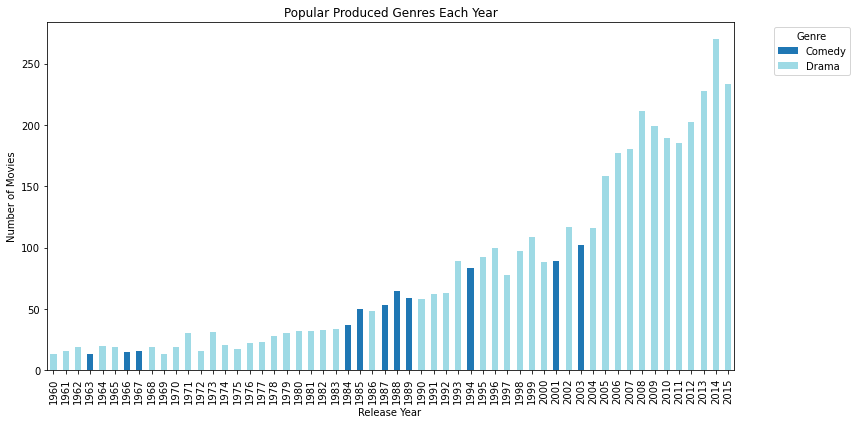

In [497]:
genree = df2.groupby(['release_year','Genres']).number_of_movies.mean().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
genree.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Popular Produced Genres Each Year')
plt.xlabel('Release Year ')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### What kinds of properties are associated with movies that have high revenues?

Exoloring revenue data:

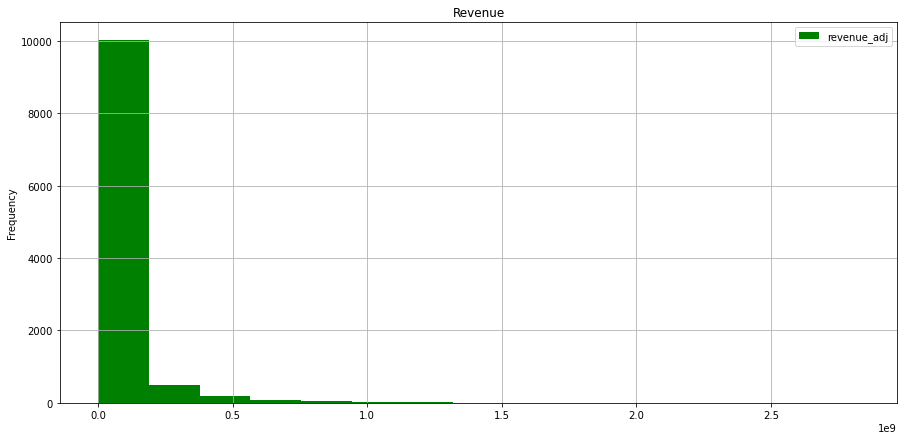

In [460]:
df['revenue_adj'].plot(kind='hist',figsize=(15,7),bins=15,color='green',title='Revenue')
plt.legend()
plt.grid()
plt.show()

                        Most of movies generate less than 250 millions dollars

In [455]:
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

**Time:**

In [317]:
df_yr=df.dropna(subset=['release_year','revenue_adj'])

In [318]:
df_yr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
revenue_adj             10865 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1018.6+ KB


Show How many movies produced each year.

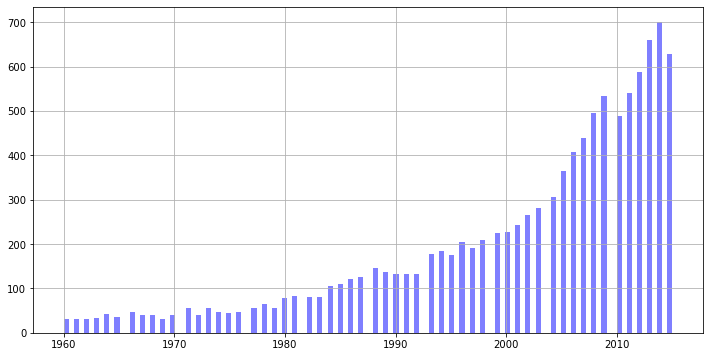

In [425]:
df_yr['release_year'].hist(alpha=0.5, bins=120, figsize=(12, 6),color='blue')

which year did movies generate more revenue?

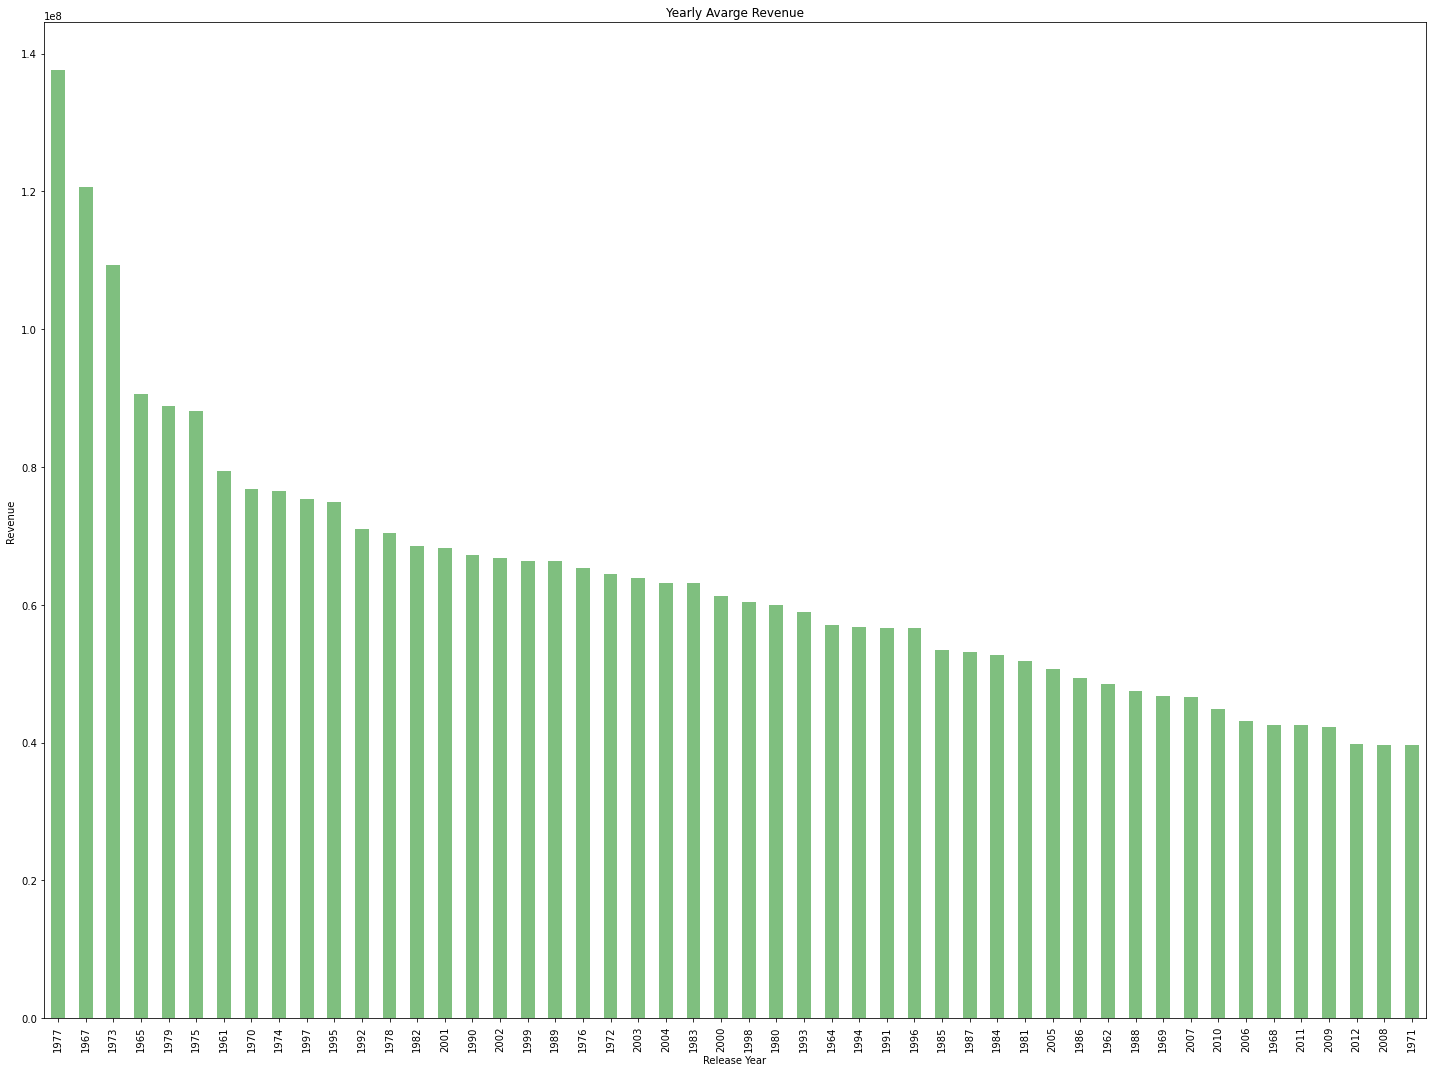

In [319]:
j=df_yr.groupby(['release_year'])['revenue_adj'].mean().sort_values(ascending = False)[:50]
#calculate the avarge revenue generated by movies each year and sort the and pick the highest fifty and plot it

plt.figure(figsize=(20, 15))
j.plot(alpha=0.5,color= 'green',kind='bar',label='revenue')

plt.xlabel('Release Year')
plt.ylabel('Revenue ')
plt.title('Yearly Avarge Revenue')

plt.tight_layout()
plt.show()


                        Graph shows that movies produced in 1977 generted the highest average revenue 


Creating function that adjust data and plot it:

In [486]:
def my_plot(df,x):
    df_p=df.dropna(subset=[x,'revenue_adj'])
    k=colspliter(df_p,x).groupby([x])['revenue_adj'].mean().sort_values(ascending = False)[:40]
    #calculate the avarge revenue generated by each production company and sort the and pick the highest fifty and plot it
    plt.figure(figsize=(20, 15))
    color_list=['k','b','c' ,'g' ,'m' ,'r' ,'y']
    k.plot(alpha=0.5,color=random.choice(color_list) ,kind='bar')
    plt.xlabel(x.replace('_',' ').title())
    plt.ylabel('Average Revenue ')
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title((x.replace('_',' ') +' ' +'and Revenue Generated ').title())
    plt.tight_layout()
    plt.show()

**Production Company:**

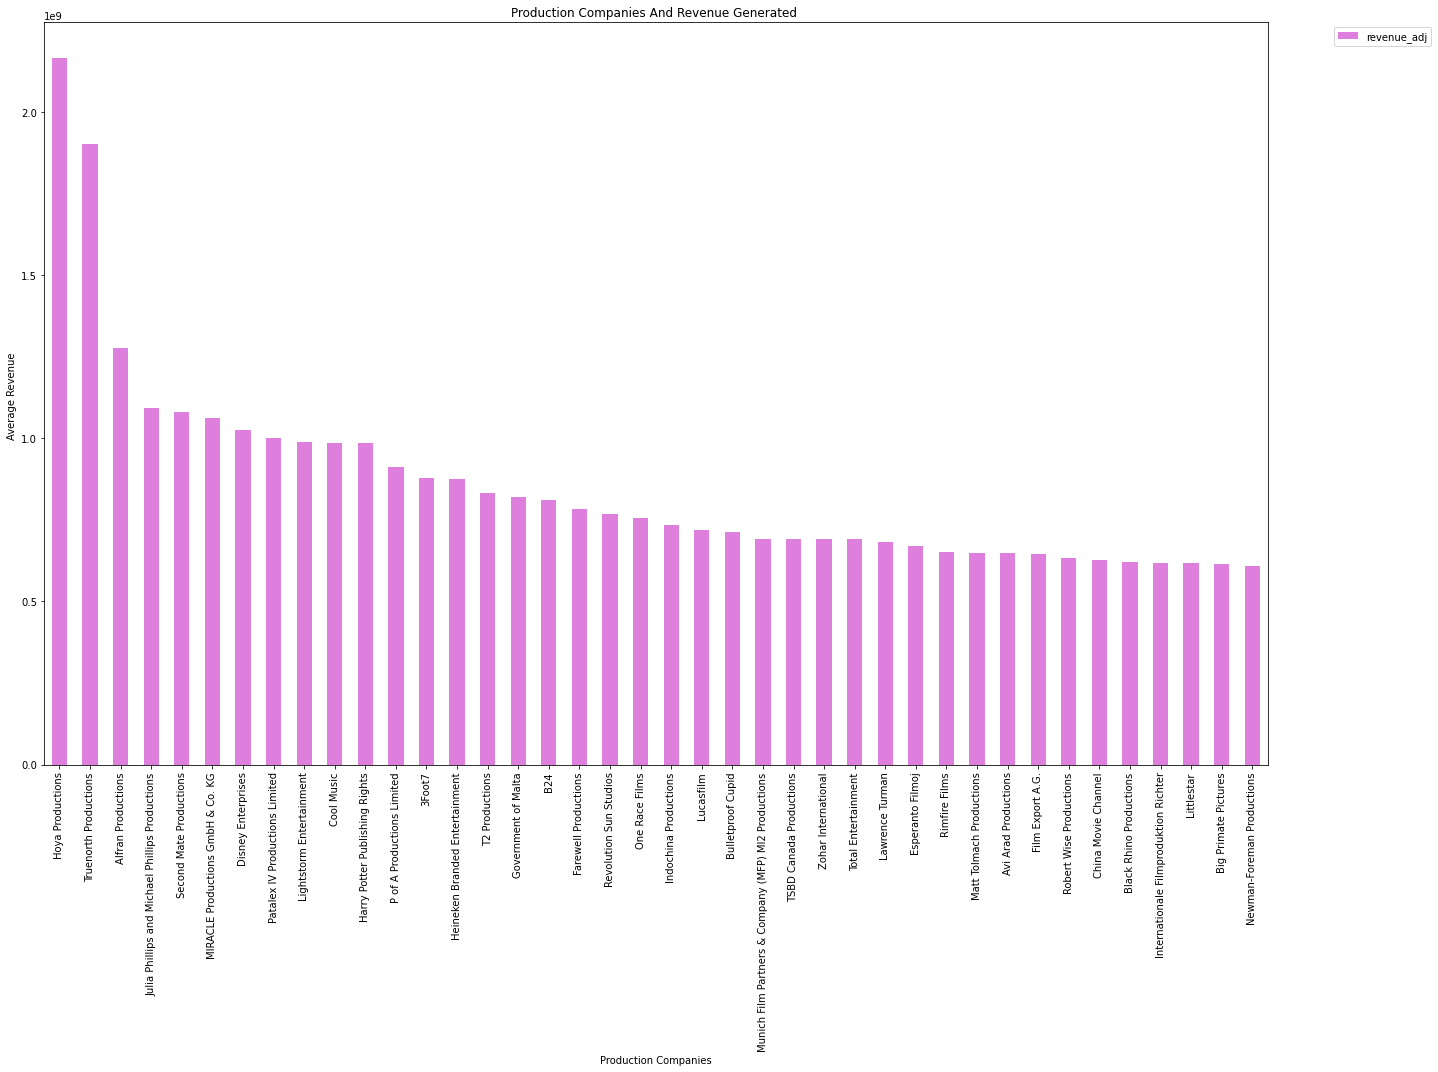

In [487]:
my_plot(df,'production_companies')

            Hoya Productions and Truenorth Productions make more avarage revenue than the rest of compamies

**Cast**

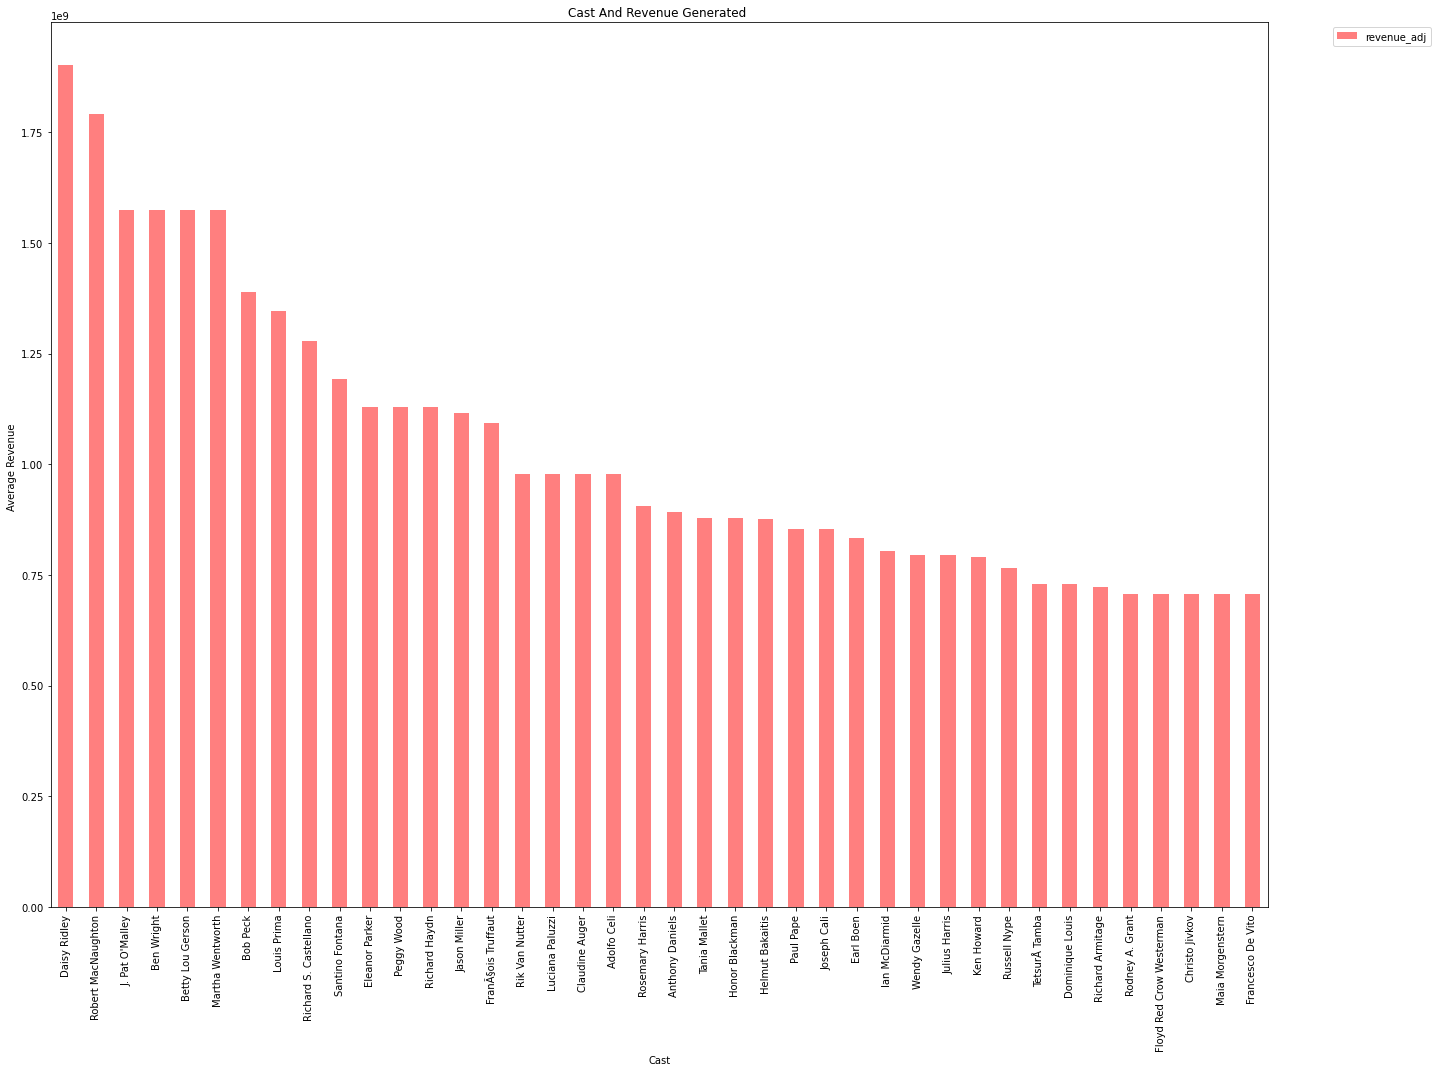

In [488]:
my_plot(df,'cast')

                  Movies casted by Daisey Ridley and Robert McNaughton hava the hightest Average revenue. 

**Director:**

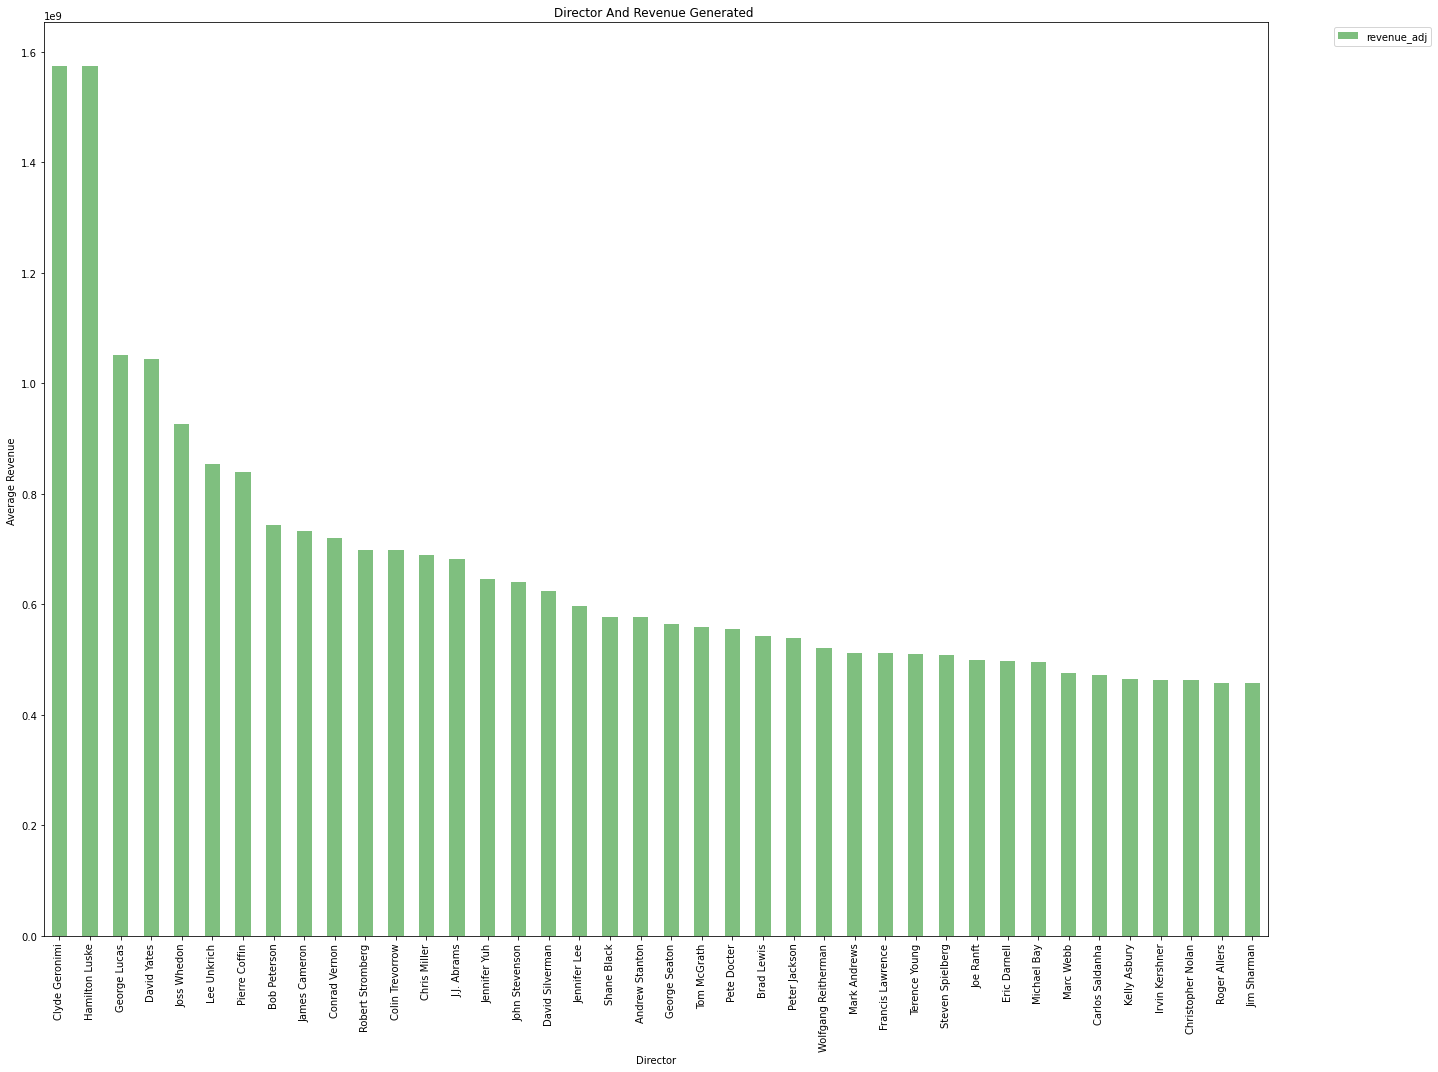

In [489]:
my_plot(df,'director')

                Movies directed by Hamilton Clyde Geronimi and Hamilton Luske hava the hights Average revenue.

**Genres:**

In [328]:
df_g=df.dropna(subset=['genres','revenue_adj'])

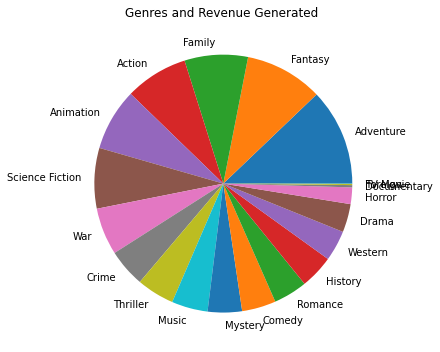

In [366]:
g=colspliter(df,'genres').groupby(['genres'])['revenue_adj'].mean().sort_values(ascending = False)

plt.figure(figsize=(10, 5))
g.plot(kind='pie', label=' ')

plt.title('Genres and Revenue Generated ')
plt.tight_layout()
plt.show()

          Adventure Movies tend to generate the highest average revenue 

<a id='conclusions'></a>
## Conclusions

**1. Which genres are most popular from year to year**:


The answer to the question can be summarize in the plot below. 
According to TMDB Oregnazition the Popularity is calculated by taking these numbers:Number of votes for the day, Number of views for the day
,Number of users who marked it as a "favourite" for the day,Number of users who added it to their "watchlist" for the day,Release date
,Number of total votes and Previous days score.

**The limitation:**

The popularity measure is not constant and can change overtime.

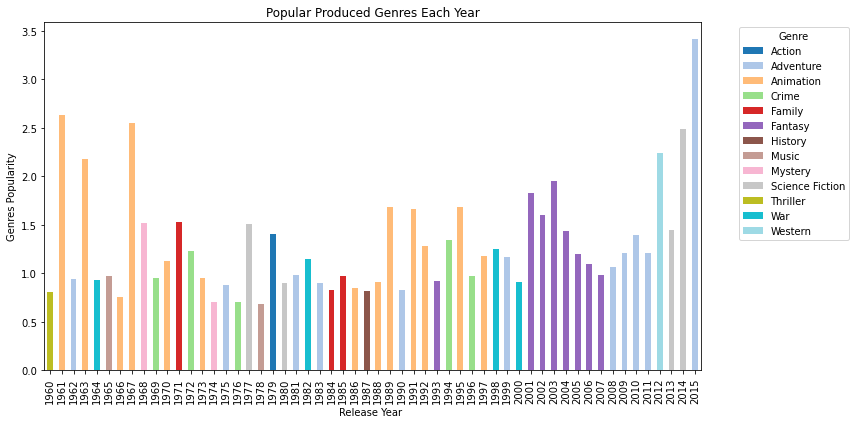

**2.What kinds of properties are associated with movies that have high revenues?**


Movies that have high revenues:

Movies produced in 1977.

Produced by Hoya Productions and Truenorth Productions companies.

Movies casted by Daisey Ridley and Robert McNaughton.
 
Movies directed by Hamilton Clyde Geronimi and Hamilton Luske.
  
Adventure Movies tend to generate.

**The limitations:**

Revenue can increase over years.

Number of movies in earlier years in the dataset are less than the later years.


In [340]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0